# Train CNN for MNIST dataset. ###

#### The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database of handwritten digits, has a training set of 60,000 28x28 grayscale images of the 10 digits, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [27]:
#importing and installing the necessary modules
from keras.datasets import mnist
import numpy as np

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


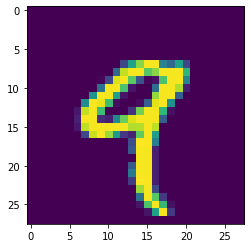

Label of this image is 9


In [29]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [30]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [31]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [32]:
#importing the model
from keras.models import Sequential
     

In [33]:
#creating model object
model=Sequential()

In [34]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [35]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [40]:
#compiling
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
     

In [41]:
#training the model
model.fit(xtrain,ytrain,batch_size=100,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
600/600 [==============================] - 39s 63ms/step - loss: 0.1278 - accuracy: 0.9600 - val_loss: 0.0366 - val_accuracy: 0.9885
Epoch 2/5
600/600 [==============================] - 38s 64ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0255 - val_accuracy: 0.9911
Epoch 3/5
600/600 [==============================] - 45s 75ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0311 - val_accuracy: 0.9895
Epoch 4/5
600/600 [==============================] - 45s 75ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0304 - val_accuracy: 0.9909
Epoch 5/5
600/600 [==============================] - 40s 67ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0288 - val_accuracy: 0.9901


In [43]:

#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 5s 15ms/step - loss: 0.0288 - accuracy: 0.9901


([0.011578080244362354, 0.9962999820709229],
 [0.028759419918060303, 0.9901000261306763])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)             

#### model_accuracy on xtrain,ytrain =  1875/1875 [==============================] - 21s 11ms/step - loss: 0.0116 - accuracy: 0.9963 or 99.63%

#### model_accuracy on xtest,ytest = 313/313 [==============================] - 5s 15ms/step - loss: 0.0288 - accuracy: 0.9901 0r 99.01